In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.linalg as la
from math import sqrt
from math import log
from math import exp
import math
import pandas as pd
from pandas import DataFrame
print("Modules Imported!")

Modules Imported!


# Team Indices

In [46]:
offense = pd.read_csv("OffensiveStats.csv", delimiter=',')
defense = pd.read_csv("DefensiveStats.csv", delimiter=',')
#for index, row in offense.iterrows():
    #print(index , row['Tm'])

# Setting up Matrix

In [47]:
#Needed Stats
OPass = offense["NY/A"].values
DPass = defense["NY/A"].values
ORush = offense["Y/A"].values
DRush = defense["Y/A"].values
OPen = offense["PenYds"].values
DPen = defense["PenYds"].values
OTO = offense["TO%"].values
DTO = defense["TO%"].values
OSc = offense["Sc%"].values
DSc = defense["Sc%"].values
OPly = offense["Ply"].values
DPly = defense["Ply"].values
OExp = offense["EXP"].values
DExp = defense["EXP"].values
Gs = offense["G"].values

teams = len(offense)
rows, cols = (teams, 15) 
       
def addStats(rows, cols):
    arr = np.zeros((rows, cols)) 
    arr[:,0] = OPass 
    arr[:,1] = DPass
    arr[:,2] = ORush
    arr[:,3] = DRush
    arr[:,4] = OPen
    arr[:,5] = DPen
    arr[:,6] = OTO
    arr[:,7] = DTO
    arr[:,8] = OSc 
    arr[:,9] = DSc
    arr[:,10] = OPly 
    arr[:,11] = DPly
    arr[:,12] = OExp
    arr[:,13] = DExp 
    arr[:,14] = Gs
    return arr
statArray = addStats(rows, cols)


# Weight Stats

In [48]:
def RunGame(team1, team2):
    x1 = (statArray[team1][0] + statArray[team2][1])*statArray[team1][10]/2
    y1 = (statArray[team2][0] + statArray[team1][1])*statArray[team2][10]/2
    x2 = (statArray[team1][2] + statArray[team2][3])*statArray[team1][10]/2
    y2 = (statArray[team2][2] + statArray[team1][3])*statArray[team2][10]/2
    x3 = (0.5*statArray[team1][4]/statArray[team1][14] + 0.5*statArray[team2][5]/statArray[team2][14])
    y3 = (0.5*statArray[team2][4]/statArray[team2][14] + 0.5*statArray[team1][5]/statArray[team1][14])
    x4 = (0.5*statArray[team1][6] + 0.5*statArray[team2][7])
    y4 = (0.5*statArray[team2][6] + 0.5*statArray[team1][7])
    x5 = (0.5*statArray[team1][8] + 0.5*statArray[team2][9])
    y5 = (0.5*statArray[team2][8] + 0.5*statArray[team1][9])
    x6 = (statArray[team1][10] + statArray[team2][11])/2
    y6 = (statArray[team2][10] + statArray[team1][11])/2
    home = 0.1
    return [x1+x2,y1+y2,x3-y3,x4-y4,x5-y5,home]

#Must change this!!
RunGamesSize = 6

def CalculateGame(team1,team2,theta):
    X = RunGame(team1, team2)
    return X@theta

# Matching Index to Teams

In [49]:
def teamIndex(t):
    if t == "ARI":
        return 0
    elif t == "ATL":
        return 1
    elif t == "BAL":
        return 2
    elif t == "BUF":
        return 3
    elif t == "CAR":
        return 4
    elif t == "CHI":
        return 5
    elif t == "CIN":
        return 6
    elif t == "CLE":
        return 7
    elif t == "DAL":
        return 8
    elif t == "DEN":
        return 9
    elif t == "DET":
        return 10
    elif t == "GB":
        return 11
    elif t == "HOU":
        return 12
    elif t == "IND":
        return 13
    elif t == "JAX":
        return 14
    elif t == "KC":
        return 15
    elif t == "LV" or t == "OAK":
        return 16
    elif t == "LAC" or t== "SD":
        return 17
    elif t == "LA" or t== "STL":
        return 18
    elif t == "MIA":
        return 19
    elif t == "MIN":
        return 20
    elif t == "NE":
        return 21
    elif t == "NO":
        return 22
    elif t == "NYG":
        return 23
    elif t == "NYJ":
        return 24
    elif t == "PHI":
        return 25
    elif t == "PIT":
        return 26
    elif t == "SF":
        return 27
    elif t == "SEA":
        return 28
    elif t == "TB":
        return 29
    elif t == "TEN":
        return 30
    elif t == "WAS":
        return 31

# Training Theta

In [50]:
games = pd.read_csv("http://www.habitatring.com/games.csv")
games = games[games['season']== 2020]
games = games[games['week']<=17]
games = games.filter(items = [ 'home_team','away_team', 'result','spread_line'])

X = np.zeros((len(games),RunGamesSize))
Y = np.zeros(len(games))

i = 0
for index, row in games.iterrows():
    X[i] = RunGame(teamIndex(row['home_team']), teamIndex(row['away_team']))
    Y[i] = row['result']
    i+=1

Y = np.reshape(Y, [len(games),1])

xT = np.transpose(X)
yT = np.transpose(Y)

theta = la.inv(xT@X)@xT@Y
    
print(np.shape(X))
print(np.shape(Y))
print(np.shape(theta))
print(theta)

(256, 6)
(256, 1)
(6, 1)
[[ 1.26483472e-03]
 [-1.81414852e-03]
 [-1.36101791e-02]
 [-1.31965762e-01]
 [ 9.64286902e-01]
 [ 6.16962356e+01]]


# Testing Past Games

In [51]:
games = pd.read_csv("http://www.habitatring.com/games.csv")
games = games[games['season']==2020]
games = games[games['week']<=17]
games = games.filter(items = [ 'home_team','away_team', 'result','spread_line', 'season'])

confidencePoints = 0
correct = 0;
away = 0
home = 0
tie= 0
total = 0;
muM = 0
muS = 0
varM = 0
varS = 0
Z1=[];
Z2=[];
for index, row in games.iterrows():
    predicted = float(CalculateGame(teamIndex(row['home_team']), teamIndex(row['away_team']),theta))
    predicted = round(predicted,1)
    spread  = row['spread_line']
    actual = row['result']
    Z1.append(predicted-actual)
    Z2.append(spread-actual)
    muM += predicted-actual
    muS += spread-actual
    if((predicted+confidencePoints<spread and actual<spread) or (predicted-confidencePoints>spread and actual>spread)):
        if(not math.isnan(actual)):
            #print(row['home_team'], "vs ", row['away_team'], row['season'])
            #print("Predicted Spread: ", predicted)
            #print("Actual Spread: ", spread)
            #print("Actual Score: " , actual)
            correct+=1
    if(not math.isnan(actual) and abs(predicted-spread)>confidencePoints):
        #if(not(predicted+confidencePoints<spread and actual<spread) and not(predicted-confidencePoints>spread and actual>spread)):
         #   print(row['home_team'], "vs ", row['away_team'], row['season'])
          #  print("Predicted Spread: ", predicted)
           # print("Actual Spread: ", spread)
            #print("Actual Score: " , actual)
        total+=1
        if(spread<actual):
            home +=1
        elif(spread>actual):
            away+=1
        else: 
            tie+=1
muS = muS/total
muM = muM/total
for index, row in games.iterrows():
    predicted = float(CalculateGame(teamIndex(row['home_team']), teamIndex(row['away_team']),theta))
    predicted = round(predicted,1)
    spread  = row['spread_line']
    actual = row['result']
    varM += ((predicted-actual)-muM)**2
    varS += ((spread-actual)-muS)**2
varM = varM/total
varS = varS/total
    
print("Predicted ", correct, "out of ", total, " games correctly against the spread with", confidencePoints, "points confidence")
print("Out of", total, " predictions, ", away, "were away teams and ", home, "were home team with", tie, "ties")

Predicted  158 out of  252  games correctly against the spread with 0 points confidence
Out of 252  predictions,  127 were away teams and  125 were home team with 0 ties


# Last Week

In [52]:
games = pd.read_csv("http://www.habitatring.com/games.csv")
games = games[games['season']==2020]
games = games[games['week']==18]
games = games.filter(items = [ 'home_team','away_team', 'result','spread_line', 'season'])

total = 0
correct = 0

for index, row in games.iterrows():
    predicted = float(CalculateGame(teamIndex(row['home_team']), teamIndex(row['away_team']),theta))
    predicted = round(predicted,1)
    spread = row['spread_line']
    actual = row['result']
    if(abs(predicted-spread)>=confidencePoints):
        print(row['home_team'], "vs ", row['away_team'], row['season'])
        print("Predicted Spread: ", predicted)
        print("Actual Spread: ", spread)
        print("Actual Result: ", actual )
        total+=1
    if((predicted+confidencePoints<=spread and actual<spread) or (predicted-confidencePoints>=spread and actual>spread)):
        if(not math.isnan(actual)):
            #print(row['home_team'], "vs ", row['away_team'], row['season'])
            #print("Predicted Spread: ", predicted)
            #print("Actual Spread: ", spread)
            #print("Actual Score: " , actual)
            correct+=1
            print("correct")
    if(not math.isnan(actual) and abs(predicted-spread)>confidencePoints):
        #if(not(predicted+confidencePoints<spread and actual<spread) and not(predicted-confidencePoints>spread and actual>spread)):
         #   print(row['home_team'], "vs ", row['away_team'], row['season'])
          #  print("Predicted Spread: ", predicted)
           # print("Actual Spread: ", spread)
            #print("Actual Score: " , actual)
        if(spread<actual):
            home +=1
        elif(spread>actual):
            away+=1
        else: 
            tie+=1
        
print(total, "games with confidence of", confidencePoints, "points")
print("Predicted ", correct, "out of ", total, " games correctly against the spread with", confidencePoints, "points confidence")

BUF vs  IND 2020
Predicted Spread:  -0.2
Actual Spread:  7.0
Actual Result:  3.0
correct
SEA vs  LA 2020
Predicted Spread:  -2.2
Actual Spread:  3.0
Actual Result:  -10.0
correct
WAS vs  TB 2020
Predicted Spread:  -6.8
Actual Spread:  -10.0
Actual Result:  -8.0
correct
TEN vs  BAL 2020
Predicted Spread:  -5.5
Actual Spread:  -3.5
Actual Result:  -7.0
correct
NO vs  CHI 2020
Predicted Spread:  7.2
Actual Spread:  11.0
Actual Result:  12.0
PIT vs  CLE 2020
Predicted Spread:  5.3
Actual Spread:  5.0
Actual Result:  -11.0
6 games with confidence of 0 points
Predicted  4 out of  6  games correctly against the spread with 0 points confidence


# Future Games

In [53]:
games = pd.read_csv("http://www.habitatring.com/games.csv")
games = games[games['season']==2020]
games = games[games['week']==19]
games = games.filter(items = [ 'home_team','away_team', 'result','spread_line', 'season'])

total = 0
correct = 0

for index, row in games.iterrows():
    predicted = float(CalculateGame(teamIndex(row['home_team']), teamIndex(row['away_team']),theta))
    predicted = round(predicted,1)
    spread = row['spread_line']
    if(abs(predicted-spread)>=confidencePoints):
        print(row['home_team'], "vs ", row['away_team'], row['season'])
        print("Predicted Spread: ", predicted)
        print("Actual Spread: ", spread)
        total+=1
        
print(total, "games with confidence of", confidencePoints, "points")


GB vs  LA 2020
Predicted Spread:  0.5
Actual Spread:  7.0
BUF vs  BAL 2020
Predicted Spread:  -2.2
Actual Spread:  2.5
KC vs  CLE 2020
Predicted Spread:  7.4
Actual Spread:  10.5
NO vs  TB 2020
Predicted Spread:  -1.3
Actual Spread:  3.0
4 games with confidence of 0 points


# Home Teams

In [54]:
games = pd.read_csv("http://www.habitatring.com/games.csv")
games = games[games['season']>=2000]
games = games[games['season']<2020]
games = games.filter(items = [ 'home_team','away_team', 'result','spread_line', 'season'])

total= 0;
numGames= 0;
for index, row in games.iterrows():
    numGames+=1
    total += row['result']
    
averagePast = total/numGames
    
print("The average home field advantage from 2000-2019 is: " , averagePast)

games = pd.read_csv("http://www.habitatring.com/games.csv")
games = games[games['season']==2020]
games = games[games['week']<=16]
games = games.filter(items = [ 'home_team','away_team', 'result','spread_line', 'season'])

total= 0;
numGames= 0;
for index, row in games.iterrows():
    numGames+=1
    total += row['result']
    
average = total/numGames
    
print("The average home field advantage in 2020 is: " , average)


The average home field advantage from 2000-2019 is:  2.4350112697220134
The average home field advantage in 2020 is:  0.14166666666666666


# Graphing

Model Mu and Std:
0.0011904761904762162
11.74596682697939
Spread Mu and Std:
1.0138888888888888
12.832376784327218


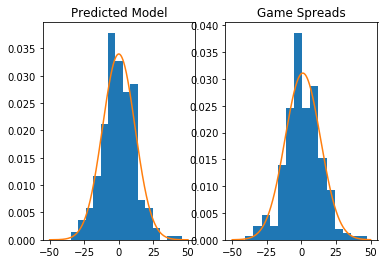

In [55]:
x =  np.linspace(-50,50,1000)
S = st.norm(muS, np.sqrt(varS))
M = st.norm(muM, np.sqrt(varM))

plt.subplot(1,2,1)
plt.hist(Z1,15,density=True)
plt.plot(x,M.pdf(x))
plt.title('Predicted Model')
plt.subplot(1,2,2)
plt.hist(Z2,15,density=True)
plt.plot(x,S.pdf(x))
plt.title('Game Spreads')

print("Model Mu and Std:")
print(muM)
print(sqrt(varM))

print("Spread Mu and Std:")
print(muS)
print(sqrt(varS))
